## MARS Model 

In [ ]:
import pyearth
from pyearth import Earth
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import and read data
df= pd.read_csv(r'C:/Users/Melanie/Downloads/QSARRegressionDataFinal.csv')


train= df[df['Set']=='Train']
test= df[df['Set']=='Test']

x_train= train[train.columns[5:27]]
y_train=train.loc[:,'logBCF']

x_test= test[test.columns[5:27]]
y_test=test.loc[:,'logBCF']

x=df[test.columns[5:27]]
y= df.loc[:, 'logBCF']
# print(y_test)


C:\Users\Melanie\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Melanie\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth Model
--------------------------------------
Basis Function   Pruned  Coefficient  
--------------------------------------
(Intercept)      No      1.54136      
h(MLOGP-1)       No      0.572627     
h(1-MLOGP)       Yes     None         
Class            No      -0.348782    
h(MW-346.095)    No      -0.0288213   
h(346.095-MW)    Yes     None         
numNitrogen      No      -0.150858    
h(F04[C-O]-16)   No      -0.284248    
h(16-F04[C-O])   Yes     None         
numSi            No      0.442476     
h(piPC09-7.974)  No      -0.850541    
h(7.974-piPC09)  Yes     None         
numSulf          No      0.152137     
h(numTbonds-1)   Yes     None         
h(1-numTbonds)   Yes     None         
numRings         No      0.119975     
numDbonds        Yes     None         
h(numDbonds-4)   Yes     None         
h(4-numDbonds)   No      0.100071     
numHalo          No      0.0813131    
ON1V             Yes     None         
nHM              No      0.104376     
h(nHM-7)     

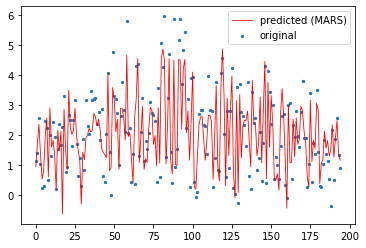

R^2:  0.7362866125438201
Mean Square Error:  0.5124879860995325
Root Mean Square:  0.715882662242586


In [83]:
# Unprocessed data

mars= model.fit(x_train,y_train)
print(mars.summary())

y_predict= model.predict(x_test)
print('Prediction:', y_predict[0])

# print(len(x_train))
x_ax = range(len(x_test))
plt.scatter(x_ax, y_test, s=5, label="original")
plt.plot(x_ax, y_predict, lw=0.8, color="red", label="predicted (MARS)")
plt.legend()
plt.show()

mse = mean_squared_error(y_test,y_predict)
print ("R^2: ", model.score(x_test,y_test))
print ("Mean Square Error: ", mse)
print ("Root Mean Square: ", math.sqrt(mse))


C:\Users\Melanie\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Melanie\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth Model
--------------------------------------
Basis Function   Pruned  Coefficient  
--------------------------------------
(Intercept)      No      0.804259     
h(x4+1.36634)    No      0.923765     
h(-1.36634-x4)   Yes     None         
x9               No      -0.318835    
h(x21-0.933662)  Yes     None         
h(0.933662-x21)  No      -2.14822     
x12              No      -0.154617    
h(x8-2.76128)    Yes     None         
h(2.76128-x8)    Yes     None         
x19              No      0.0764198    
h(x1-1.51676)    No      -2.51128     
h(1.51676-x1)    Yes     None         
x17              No      0.0927743    
h(x15-3.80003)   Yes     None         
h(3.80003-x15)   Yes     None         
x13              No      0.135496     
x14              Yes     None         
h(x14-2.96527)   Yes     None         
h(2.96527-x14)   No      0.0954793    
x16              No      0.311949     
x5               No      0.406789     
x0               Yes     None         
h(x0-2.67553)

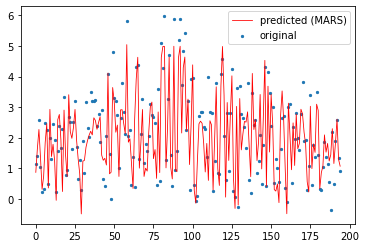

R^2:  0.7326538766466022
Mean Square Error:  0.5195476713205042
Root Mean Square:  0.72079655334949


In [78]:
#Scaling data to increase accuracy
scaler=StandardScaler()
x_train_s= scaler.fit_transform(x_train)
x_test_s= scaler.fit_transform(x_test)
model =Earth()

mars= model.fit(x_train_s,y_train)

print(mars.summary())

y_predict= model.predict(x_test_s)
print('Prediction:', y_predict[0])

# print(len(x_train))
x_ax = range(len(x_test_s))
plt.scatter(x_ax, y_test, s=5, label="original")
plt.plot(x_ax, y_predict, lw=0.8, color="red", label="predicted (MARS)")
plt.legend()
plt.show()

mse = mean_squared_error(y_test,y_predict)
print ("R^2: ", model.score(x_test_s,y_test))
print ("Mean Square Error: ", mse)
print ("Root Mean Square: ", math.sqrt(mse))
